In [61]:
# Simple CNN model for CIFAR-10
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
#from keras import backend as K
#K.set_image_dim_ordering('th')
import matplotlib.pyplot as plt

In [2]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load data

In [51]:
(X_train, y_train_), (X_test, y_test_) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train_)
y_test = np_utils.to_categorical(y_test_)
num_classes = y_test.shape[1]

In [4]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

C:\Users\vamsi7\anaconda3\envs\homl_env\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [82]:
# in class programming change

# Create the model
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Conv2D(64, (3,3), activation='relu',padding = 'same'))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(64, (3,3), activation='relu',padding = 'same'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Conv2D(128, (3,3), activation='relu',padding = 'same'))
model_1.add(Dropout(0.2))
model_1.add(Conv2D(128, (3,3), activation='relu',padding = 'same'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Flatten())
model_1.add(Dropout(0.2))
model_1.add(Dense(1024, activation='relu'))
model_1.add(Dropout(0.2))         
model_1.add(Dense(512, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model_1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model_1.summary())

# Fit the model
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model_1.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)       

In [83]:
y_pred = model.predict(X_test)

In [86]:
# predict few images of test data

# def show_batch(images,actual_labels,predicted_labels):
#     for idx,image,act_label,pred_label in enumerate(zip(images,actual_labels,predicted_labels)):
#         fig, ax = plt.subplots(figsize=(5, 1))
#         ax.set_xticks([]); ax.set_yticks([])
#         ax.imshow(image)
#         plt.title(f"Actual label : {act_label} , Predicted label: {pred_label}")
# #         ax.imshow(make_grid(image, nrow=1).permute(1, 2, 0))
#         break
    
    
    
def show_batch(images, actual_labels, predicted_labels):
    # Correctly using enumerate with zip
    for idx, (image, act_label, pred_label) in enumerate(zip(images, actual_labels, predicted_labels)):
        fig, ax = plt.subplots(figsize=(5, 5))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(image)
        plt.title(f"Actual label: {np.argmax(act_label)}, Predicted label: {np.argmax(pred_label)}")
#         break  # This will only show the first image. If you want to show all images, remove this line.

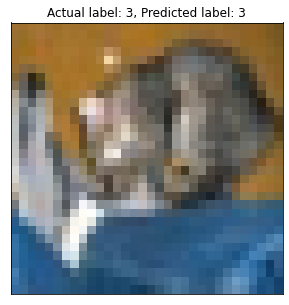

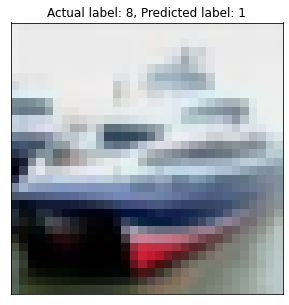

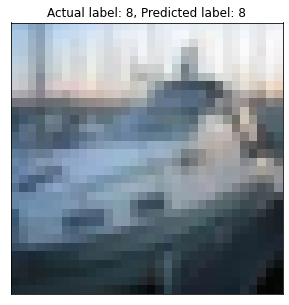

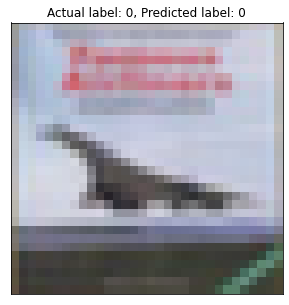

In [87]:
show_batch(X_test[:4],y_test[:4],y_pred[:4])

In [ ]:
# plot loss and accuracy